In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_Data.csv"

In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


5.2.4 - inspect city data dataframe

In [6]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
print(sum(city_data_df["type"]=="Urban"))
print(sum(city_data_df["type"]=="Suburban"))
print(sum(city_data_df["type"]=="Rural"))

66
36
18


In [11]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


5.3.1

In [15]:
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [17]:
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

In [19]:
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]

In [21]:
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]

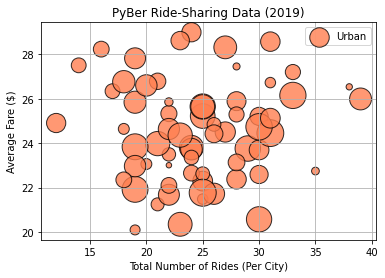

In [23]:
plt.scatter(urban_ride_count, urban_avg_fare, label = "Urban", s = 10*urban_driver_count, edgecolor = 'k',
           linewidths = 1, alpha = .8, c = 'coral')
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

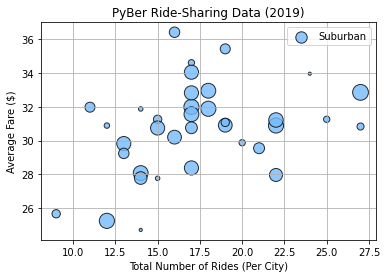

In [24]:
plt.scatter(suburban_ride_count, suburban_avg_fare, label = "Suburban", s = 10*suburban_driver_count, 
            edgecolor = 'k',linewidths = 1, alpha = .8, c = 'xkcd:sky blue')
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

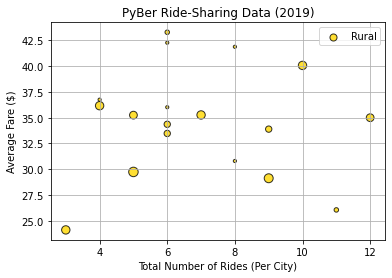

In [25]:
plt.scatter(rural_ride_count, rural_avg_fare, label = "Rural", s = 10*rural_driver_count, 
            edgecolor = 'k',linewidths = 1, alpha = .8, c = 'gold')
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

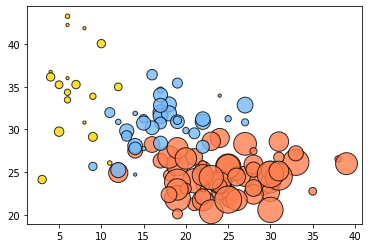

In [26]:
plt.scatter(urban_ride_count, urban_avg_fare, label = "Urban", s = 10*urban_driver_count, 
            edgecolor = 'k', linewidths = 1, alpha = .8, c = 'coral')
plt.scatter(suburban_ride_count, suburban_avg_fare, label = "Suburban", s = 10*suburban_driver_count, 
            edgecolor = 'k',linewidths = 1, alpha = .8, c = 'xkcd:sky blue')
plt.scatter(rural_ride_count, rural_avg_fare, label = "Rural", s = 10*rural_driver_count, 
            edgecolor = 'k',linewidths = 1, alpha = .8, c = 'gold')

plt.show()

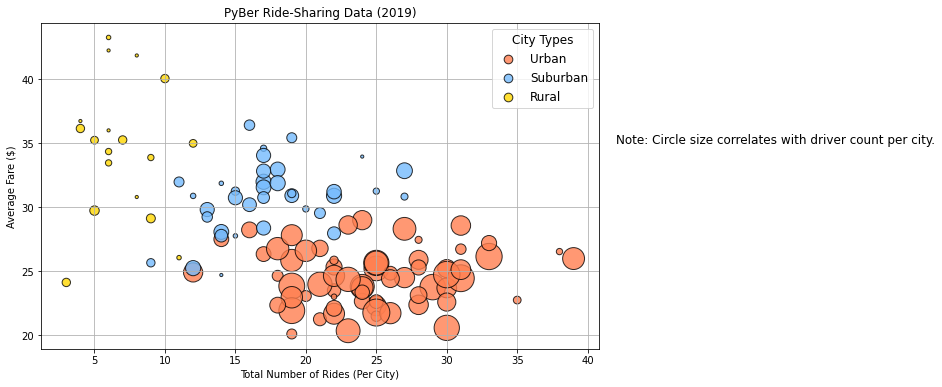

In [27]:
plt.subplots(figsize = (10,6))

plt.scatter(urban_ride_count, urban_avg_fare, label = "Urban", s = 10*urban_driver_count, 
            edgecolor = 'k', linewidths = 1, alpha = .8, c = 'coral')
plt.scatter(suburban_ride_count, suburban_avg_fare, label = "Suburban", s = 10*suburban_driver_count, 
            edgecolor = 'k',linewidths = 1, alpha = .8, c = 'xkcd:sky blue')
plt.scatter(rural_ride_count, rural_avg_fare, label = "Rural", s = 10*rural_driver_count, 
            edgecolor = 'k',linewidths = 1, alpha = .8, c = 'gold')

# create a legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded", scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()



5.4.1

In [28]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [29]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [30]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [31]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

using pandas

In [32]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [33]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [34]:
suburban_ride_count.mode()

0    17
dtype: int64

using numpy

In [35]:
import numpy as np
import scipy.stats as sts

In [36]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}")

The mean for the ride counts for urban trips is 24.62121212121212
The median for the ride counts for urban trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7]))


In [37]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7]))
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5]))


5.4.2

In [38]:
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [39]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean for the fares for urban trips is ${mean_urban_fares:.2f}")

median_urban_fares = np.median(urban_fares)
print(f"The median for the fares for urban trips is ${median_urban_fares:.2f}")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode for the fares for urban trips is {mode_urban_fares}")

The mean for the fares for urban trips is $24.53
The median for the fares for urban trips is $24.64
The mode for the fares for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [40]:
suburban_fares = suburban_cities_df["fare"]


In [41]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean for the fares for suburban trips is ${mean_suburban_fares:.2f}")

median_suburban_fares = np.median(suburban_fares)
print(f"The median for the fares for suburban trips is ${median_suburban_fares:.2f}")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode for the fares for suburban trips is {mode_suburban_fares}")

The mean for the fares for suburban trips is $30.97
The median for the fares for suburban trips is $30.75
The mode for the fares for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))


In [42]:
rural_fares = rural_cities_df["fare"]


In [43]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean for the fares for rural trips is ${mean_rural_fares:.2f}")

median_rural_fares = np.median(rural_fares)
print(f"The median for the fares for rural trips is ${median_rural_fares:.2f}")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode for the fares for rural trips is {mode_rural_fares}")

The mean for the fares for rural trips is $34.62
The median for the fares for rural trips is $37.05
The mode for the fares for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


In [44]:
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [45]:
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [46]:
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.mean(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.mean(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.mean(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)


<function matplotlib.pyplot.show(close=None, block=None)>

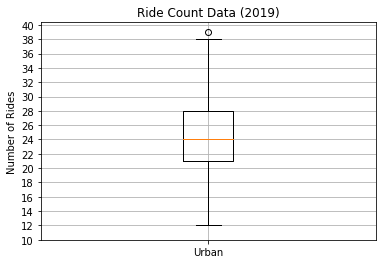

In [47]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

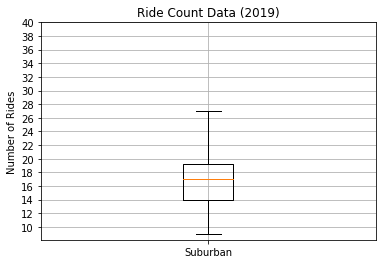

In [48]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

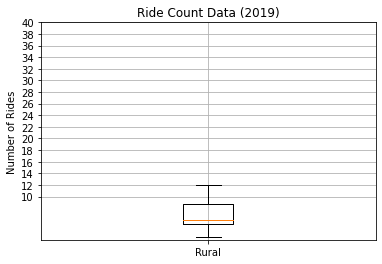

In [49]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show

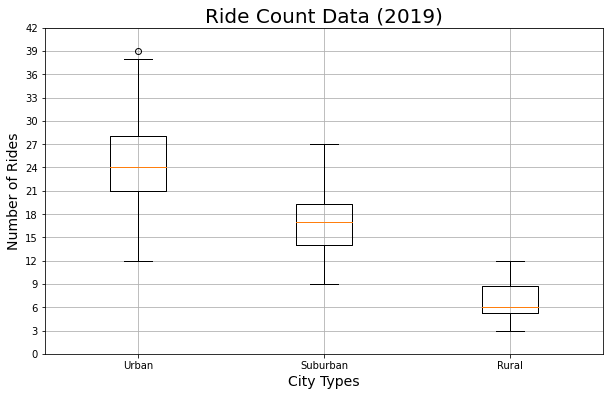

In [50]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [51]:
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


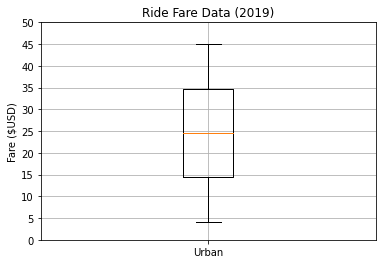

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [52]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

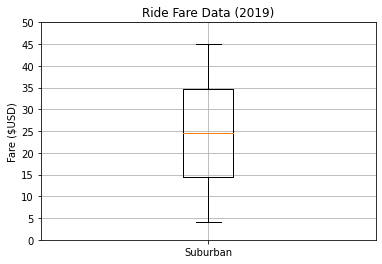

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [53]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

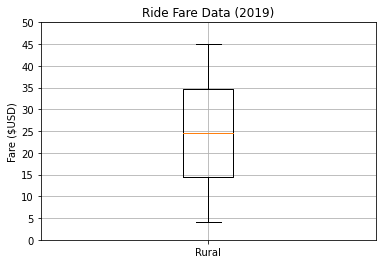

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [54]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

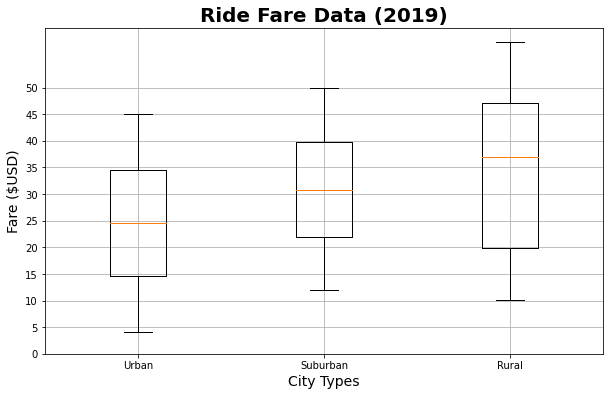

In [55]:
x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(fares_data, labels = x_labels)

ax.set_title("Ride Fare Data (2019)", fontsize = 20, weight = 'bold')
ax.set_ylabel('Fare ($USD)', fontsize = 14)
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.set_xlabel("City Types", fontsize = 14)
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

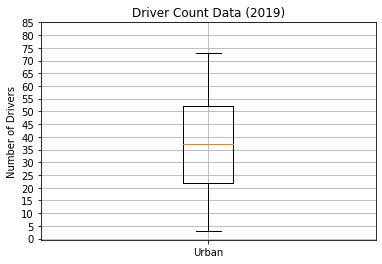

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [56]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

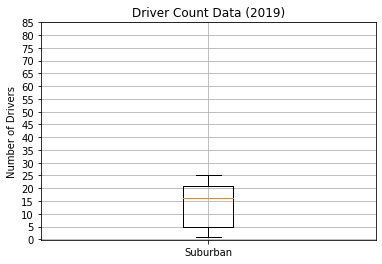

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [57]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

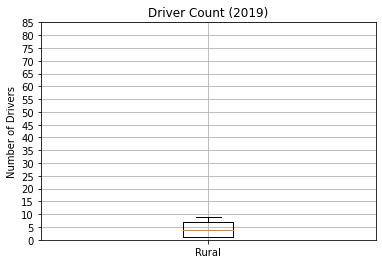

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [58]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)
ax.set_title("Driver Count (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90 , step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

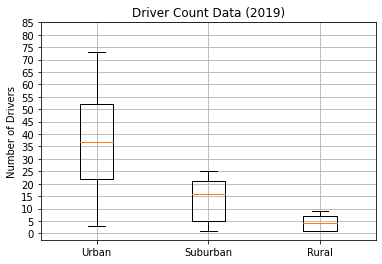

In [59]:
x_labels = ["Urban", "Suburban", "Rural"]
driver_count = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_count, labels = x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()

5.5.1

In [60]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
total_fares = pyber_data_df.sum()["fare"]
total_fares

63538.64

In [62]:
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

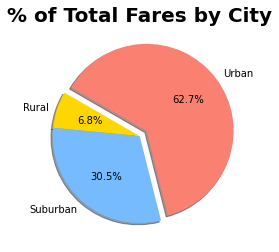

In [63]:
labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'xkcd:sky blue', 'salmon']
explode = [0, 0, .1]
plt.pie(type_percents, autopct = "%1.1f%%", labels = labels, colors = colors, explode = explode, shadow = True,
       startangle = 150)
plt.title("% of Total Fares by City", fontsize=20, weight = 'bold')
plt.show()

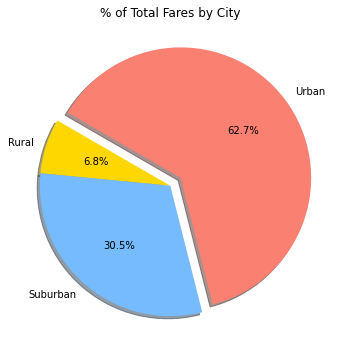

In [64]:
import matplotlib as mpl

labels = ["Rural", "Suburban", "Urban"]
colors = ['gold', 'xkcd:sky blue', 'salmon']
explode = [0, 0, .1]

plt.subplots(figsize=(10,6))
plt.pie(type_percents, autopct = "%1.1f%%", labels = labels, colors = colors, explode = explode, shadow = True,
       startangle = 150)

plt.title("% of Total Fares by City")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png")
plt.show()

5.6.1

In [65]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [66]:
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [67]:
total_rides = pyber_data_df.count()["ride_id"]
total_rides

2375

In [68]:
rides_by_type_pct = rides_by_type / total_rides *100
rides_by_type_pct

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

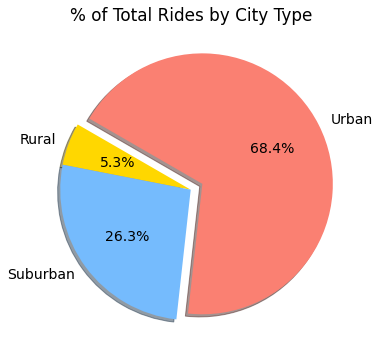

In [69]:
labels = ["Rural", "Suburban", "Urban"]
explode = [0 ,0, .1]
colors = ['gold', 'xkcd:sky blue', 'salmon']

plt.subplots(figsize = (10,6))
plt.pie(rides_by_type, labels = labels, autopct = "%1.1f%%", startangle = 150, explode = explode,
       shadow = True, colors = colors)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/Fig6.png")
plt.show()

5.7.1

In [70]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [71]:
drivers_by_type_pct = 100*(pyber_data_df.groupby(['type']).sum()['driver_count']) / (pyber_data_df['driver_count'].sum())
drivers_by_type_pct

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

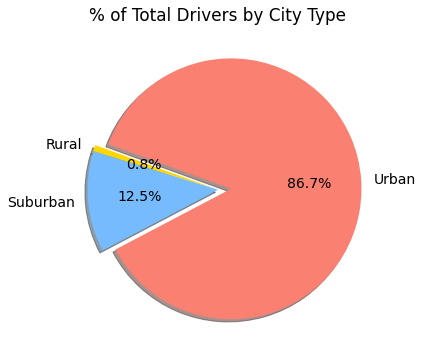

In [72]:
labels = ["Rural", "Suburban", "Urban"]
explode = [0, 0, .1]
colors = ['gold', 'xkcd:sky blue', 'salmon']
plt.subplots(figsize = (10,6))
plt.pie(drivers_by_type_pct, labels = labels, autopct = "%1.1f%%", explode = explode, shadow = True,
       startangle = 160, colors = colors)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig7Michal.png")

In [73]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

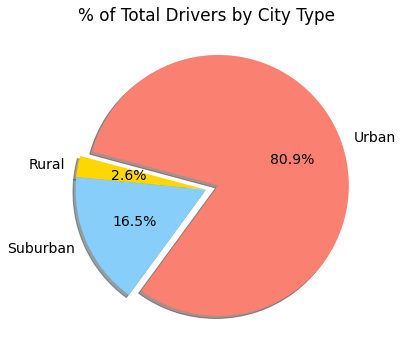

In [74]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "salmon"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()